# Geospatial Analysis 🗺️ 📊 (Zomato Case Study) 

## READING DATA 📄

In [366]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap

In [367]:
df = pd.read_csv("/Users/kiruba/Documents/GitHub/Geospatial-Analysis-Zomato-Case-Study-/data/zomato.csv")

In [368]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [369]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [370]:
df.shape

(51717, 17)

## DATA CLEANING 🧤

In [371]:
features_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]

In [372]:
for feature in features_na:
    print("'{}' has '{}' percentage missing values".format(feature, np.round(df[feature].isnull().sum()/len(df)*100,4)))

'rate' has '15.0337' percentage missing values
'phone' has '2.3358' percentage missing values
'location' has '0.0406' percentage missing values
'rest_type' has '0.4389' percentage missing values
'dish_liked' has '54.2916' percentage missing values
'cuisines' has '0.087' percentage missing values
'approx_cost(for two people)' has '0.669' percentage missing values


In [373]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [374]:
df.dropna(axis="index", subset=['rate'], inplace=True)

In [375]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [376]:
def split(x):
    return x.split('/')[0]

In [377]:
df['rate'] = df['rate'].apply(split)

In [378]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [379]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [380]:
df['rate'].replace("NEW",0,inplace=True)
df['rate'].replace("-",0,inplace=True)
df['rate'] = df['rate'].astype(float)

In [381]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

## Average Rating of Each Restaurant 🌟

In [382]:
df_rate = np.round(df.groupby('name')['rate'].mean(),1).to_frame().reset_index()
df_rate.columns = ['Restaurant','Average_Rating']
df_rate.head(10)

,Restaurant,Average_Rating
0,#FeelTheROLL,3.4
1,#L-81 Cafe,3.9
2,#refuel,3.7
3,1000 B.C,3.2
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.7
5,11 to 11 Express Biriyanis,3.5
6,1131 Bar + Kitchen,4.5
7,12th Main - Grand Mercure,4.1
8,1441 Pizzeria,4.1
9,1522 - The Pub,4.2


## Distribution of Restaurants with respect to rating 📊

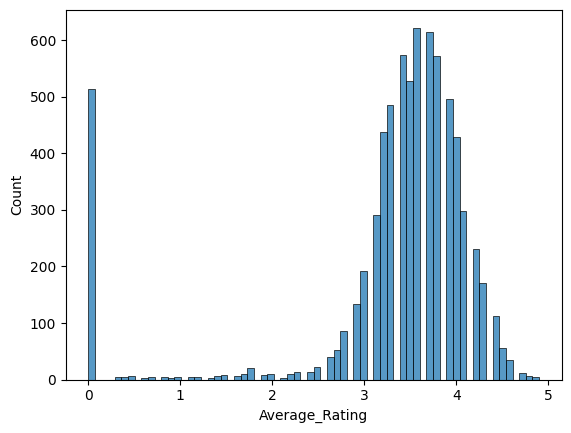

In [383]:
sns.histplot(df_rate['Average_Rating'])
plt.show()

## Getting Famous Restaurant Chains in Bangalore 🧑🏻‍🍳

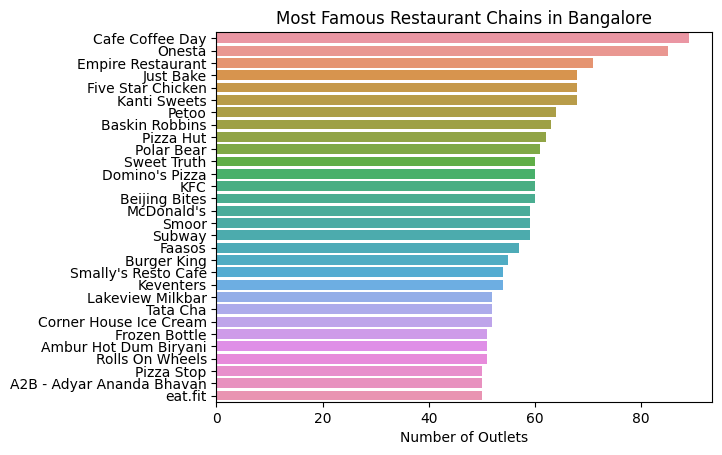

In [384]:
restaurants_chains = df['name'].value_counts()[0:30]
sns.barplot(x=restaurants_chains,y=restaurants_chains.index)
plt.title("Most Famous Restaurant Chains in Bangalore")
plt.xlabel("Number of Outlets")
plt.show()

## Restaurants that do not accept online orders 📲

In [385]:
online_orders = df['online_order'].value_counts()
labels = ["Accepted", "Not Accepted"]

In [386]:
px.pie(df,values = online_orders, labels = labels,title="Online Orders Pie Chart")

## Ratio between Restaurants has Table booking option or not 🍴

In [387]:
table_booking = df['book_table'].value_counts()
labels = ["Has Table Booking","No Table Booking"]

In [388]:
trace_goPie = go.Pie(labels = labels, values = table_booking, hoverinfo = 'label+percent', textinfo = 'value',title="Booking Options")
iplot([trace_goPie])

## Types of Restuarants that are present 📍

In [389]:
df.dropna(axis="index",subset=['rest_type'],inplace=True)

In [390]:
df['rest_type'].isnull().sum()

0

In [391]:
len(df['rest_type'].unique())

87

In [392]:
trace_goBar = go.Bar(x = df['rest_type'].value_counts().nlargest(20).index,
                     y = df['rest_type'].value_counts().nlargest(20),
                    )

In [393]:
iplot([trace_goBar])

## Highest Voted Restaurants 🌟

In [394]:
trace_goBar1 = go.Bar(x = df.groupby('name')['votes'].sum().nlargest(20).index,
                      y = df.groupby('name')['votes'].sum().nlargest(20)    
                     )

In [395]:
iplot([trace_goBar1])

## Total Restaurants in Different Loactions in Bangalore 🌏

In [396]:
restaurants_nameList = []
location_list = []
for key,location_df in df.groupby('location'):
    location_list.append(key)
    restaurants_nameList.append(len(location_df['name'].unique()))

In [397]:
df_locations = pd.DataFrame(zip(location_list,restaurants_nameList))
df_locations.columns = ['Location','Number of Restaurants']
df_locations.set_index('Location',inplace=True)
df_locations.head(10)

,Number of Restaurants
Location,
BTM,578
Banashankari,238
Banaswadi,150
Bannerghatta Road,361
Basavanagudi,195
Basaveshwara Nagar,72
Bellandur,281
Bommanahalli,60
Brigade Road,110


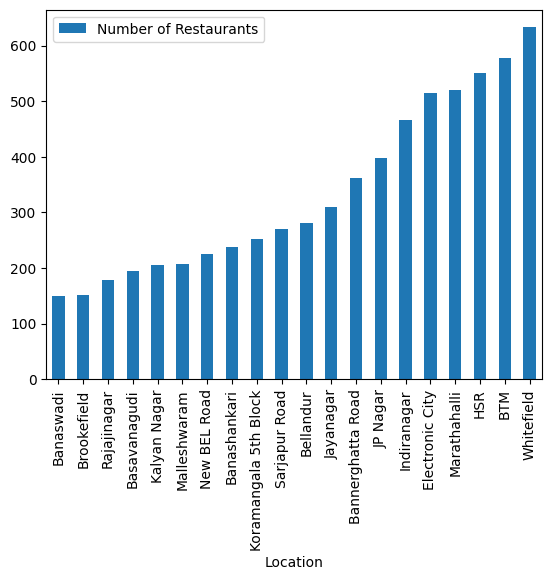

In [398]:
df_locations.sort_values(by = 'Number of Restaurants').tail(20).plot.bar()
plt.title("")
plt.show()

## Different Cusines in Bangalore 🍔🍱🍜🍲

In [399]:
trace_goBar3 = go.Bar(x = df['cuisines'].value_counts()[0:20].index,
                     y= df['cuisines'].value_counts()[0:20]
                     )

In [400]:
iplot([trace_goBar3])

## Analysing Approx (Cost for 2 people) Feature 👥

In [401]:
df['approx_cost(for two people)'].isnull().sum()

250

In [402]:
df.dropna(axis = "index", subset = ['approx_cost(for two people)'], inplace = True)

In [403]:
df['approx_cost(for two people)'].isnull().sum()

0

In [404]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [405]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x : x.replace(",",""))

In [406]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [407]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)

In [408]:
df['approx_cost(for two people)'].dtype

dtype('int64')

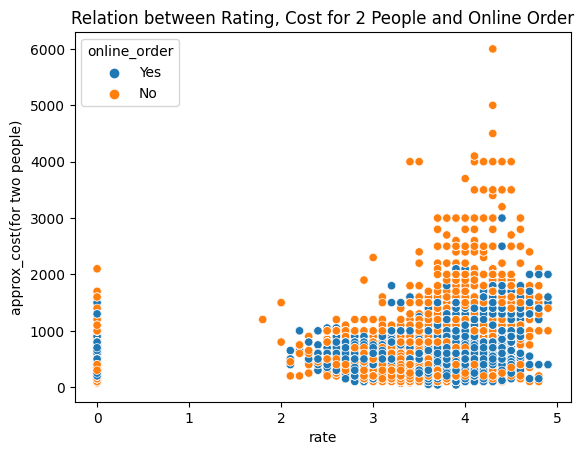

In [409]:
sns.scatterplot(x='rate',y='approx_cost(for two people)',hue='online_order',data=df)
plt.title("Relation between Rating, Cost for 2 People and Online Order")
plt.show()

## Finding the Cheapest and Luxurious Restaurant in Bangalore ⬆️ ⬇️

In [410]:
df['approx_cost(for two people)'].min()

40

In [411]:
df[df['approx_cost(for two people)'] == 40]['name']

5270     Srinidhi Sagar Food Line
12232    Srinidhi Sagar Food Line
14819    Srinidhi Sagar Food Line
17773              Srinidhi Sagar
18891    Srinidhi Sagar Food Line
27091       Srinidhi Sagar Deluxe
29785       Srinidhi Sagar Deluxe
32485              Srinidhi Sagar
Name: name, dtype: object

In [412]:
df['approx_cost(for two people)'].max()

6000

In [413]:
df[df['approx_cost(for two people)'] == 6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

In [414]:
data = df.copy()
data.set_index('name',inplace=True)

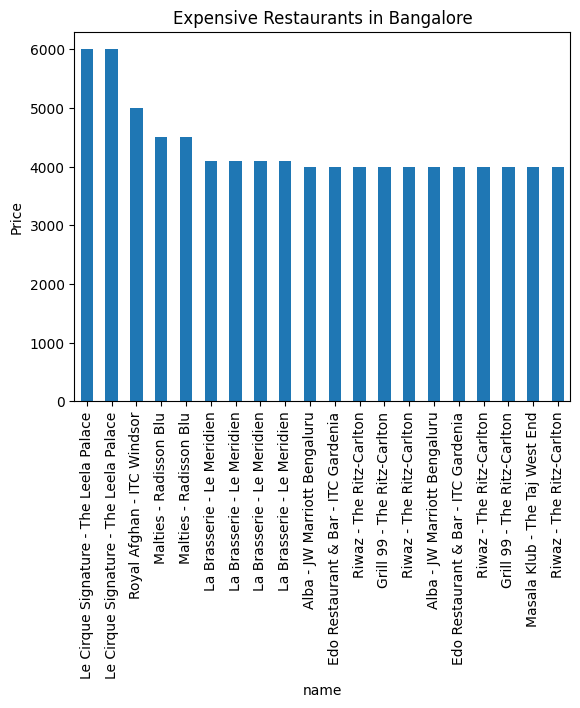

In [415]:
data['approx_cost(for two people)'].nlargest(20).plot.bar()
plt.title('Expensive Restaurants in Bangalore')
plt.ylabel('Price')
plt.show()

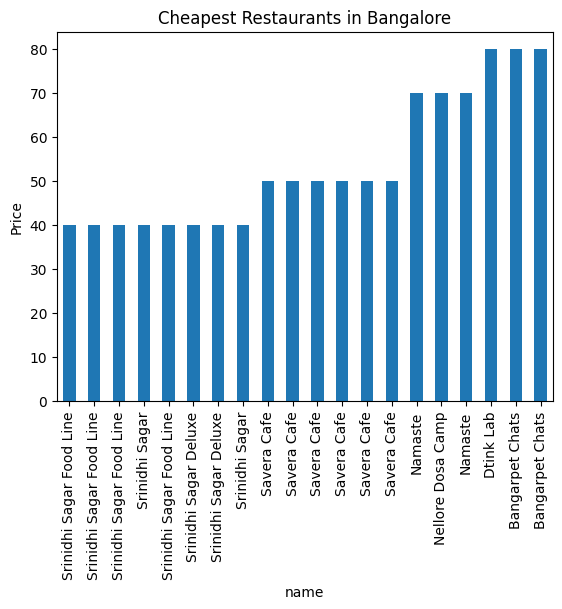

In [416]:
data['approx_cost(for two people)'].nsmallest(20).plot.bar()
plt.title('Cheapest Restaurants in Bangalore')
plt.ylabel('Price')
plt.show()

## Finding Affordable Priced Restaurants (<=500) 💸

In [417]:
df_budget = data[data['approx_cost(for two people)']<=500].loc[:,'approx_cost(for two people)']
df_budget = df_budget.reset_index()
df_budget.columns = ['Restaurant','Price']
df_budget.head()

,Restaurant,Price
0,Addhuri Udupi Bhojana,300
1,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,500
2,The Coffee Shack,500
3,Caf-Eleven,450
4,T3H Cafe,300


## Restaurants that have >4 Rating and are Affordable 🌟 💸

In [418]:
df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)].shape

(2436, 17)

In [419]:
len(df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]['name'].unique())

372

## Affordable Restaurants in all locations inside Bangalore 📍🌟 💸

In [420]:
def budget_restaurant_location(location,restaurant):
    budget = df[(df['approx_cost(for two people)']<=500) & (df['rate']>4) & (df['location']== location) & (df['rest_type']== restaurant)]
    return (budget['name'].unique())

In [421]:
budget_restaurant_location('BTM','Cafe')

array(["Ruh's Cafe"], dtype=object)

In [422]:
locations = pd.DataFrame({'Name': df['location'].unique()})
locations.head()

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout


## Showing the Number of Restaurants by Location using basemap 📍 🌏

In [423]:
geolocater = Nominatim(user_agent='app')

In [424]:
lat_lon = []
for location in locations['Name']:
    location = geolocater.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo =(location.latitude,location.longitude)
        lat_lon.append(geo)

In [425]:
locations['Geo_loc'] = lat_lon

In [426]:
locations.head()

,Name,Geo_loc
0,Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.9466619, 77.5300896)"
3,Jayanagar,"(27.64392675, 83.05280519687284)"
4,Kumaraswamy Layout,"(12.9081487, 77.5553179)"


In [427]:
Rest_locations = df['location'].value_counts().reset_index()
Rest_locations.head()

,index,location
0,BTM,4210
1,Koramangala 5th Block,2358
2,HSR,2102
3,Indiranagar,1889
4,JP Nagar,1842


In [428]:
Rest_locations.columns = ['Name','Count']

In [429]:
Restaurant_locations = Rest_locations.merge(locations,on='Name',how='left').dropna()

In [430]:
Restaurant_locations.head()

,Name,Count,Geo_loc
0,BTM,4210,"(45.95485055, -112.49659530324134)"
1,Koramangala 5th Block,2358,"(12.9348429, 77.6189768)"
2,HSR,2102,"(18.1475, 41.538889)"
3,Indiranagar,1889,"(12.9732913, 77.6404672)"
4,JP Nagar,1842,"(12.2655944, 76.6465404)"


In [431]:
lat,lon = zip(*np.array(Restaurant_locations['Geo_loc']))

In [432]:
Restaurant_locations['lat'] = lat
Restaurant_locations['lon'] = lon

In [433]:
Restaurant_locations.head()

,Name,Count,Geo_loc,lat,lon
0,BTM,4210,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Koramangala 5th Block,2358,"(12.9348429, 77.6189768)",12.934843,77.618977
2,HSR,2102,"(18.1475, 41.538889)",18.147500,41.538889
3,Indiranagar,1889,"(12.9732913, 77.6404672)",12.973291,77.640467
4,JP Nagar,1842,"(12.2655944, 76.6465404)",12.265594,76.646540


In [434]:
Restaurant_locations.drop('Geo_loc',axis=1,inplace=True)

In [435]:
Restaurant_locations.head()

,Name,Count,lat,lon
0,BTM,4210,45.954851,-112.496595
1,Koramangala 5th Block,2358,12.934843,77.618977
2,HSR,2102,18.147500,41.538889
3,Indiranagar,1889,12.973291,77.640467
4,JP Nagar,1842,12.265594,76.646540


In [436]:
def generate_baseMap(default_location=[12.97,77.59],default_zoom_start=12):
    basemap = folium.Map(location = default_location, zoom_start= default_zoom_start)
    return basemap

In [437]:
basemap = generate_baseMap()

In [438]:
HeatMap(Restaurant_locations[['lat','lon','Count']].values.tolist(),zoom=10,radius=15).add_to(basemap)

In [439]:
basemap

## Heatmap of North Indian Restaurants 🇮🇳🌏

In [440]:
df_north_rest = df[df['cuisines'] == 'North Indian']
df_north_rest.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
50,https://www.zomato.com/bangalore/petoo-banasha...,"276, Ground Floor, 100 Feet Outer Ring Road, B...",Petoo,No,No,3.7,21,+91 8026893211,Banashankari,Quick Bites,NaN,North Indian,450,"[('Rated 2.0', 'RATED\n This is a neatly made...",[],Delivery,Banashankari
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,0.0,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
87,https://www.zomato.com/bangalore/krishna-sagar...,"38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...",Krishna Sagar,No,No,3.5,31,+91 8892752997\r\n+91 7204780429,Banashankari,Quick Bites,NaN,North Indian,200,"[('Rated 1.0', 'RATED\n Worst experience with...",[],Delivery,Banashankari
94,https://www.zomato.com/bangalore/nandhini-delu...,"304, Opposite Apollo Public School, 100 Feet R...",Nandhini Deluxe,No,No,2.6,283,080 26890011\r\n080 26890033,Banashankari,Casual Dining,"Biryani, Chicken Guntur, Thali, Buttermilk, Ma...",North Indian,600,"[('Rated 3.0', 'RATED\n Ididnt like much.\n\n...",[],Delivery,Banashankari


In [441]:
north_indian = df_north_rest.groupby(['location'],as_index=False)['url'].agg('count')

In [442]:
north_indian.head()

,location,url
0,BTM,262
1,Banashankari,35
2,Banaswadi,5
3,Bannerghatta Road,60
4,Basavanagudi,17


In [443]:
north_indian.columns = ['Name','Count']
north_indian = north_indian.merge(locations,on='Name',how='left').dropna()
north_indian.head()

,Name,Count,Geo_loc
0,BTM,262,"(45.95485055, -112.49659530324134)"
1,Banashankari,35,"(15.8876779, 75.7046777)"
2,Banaswadi,5,"(13.0141618, 77.6518539)"
3,Bannerghatta Road,60,"(12.9521804, 77.6041899)"
4,Basavanagudi,17,"(12.9417261, 77.5755021)"


In [444]:
north_indian['lat'],north_indian['lon'] = zip(*north_indian['Geo_loc'].values)
north_indian.head()

,Name,Count,Geo_loc,lat,lon
0,BTM,262,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Banashankari,35,"(15.8876779, 75.7046777)",15.887678,75.704678
2,Banaswadi,5,"(13.0141618, 77.6518539)",13.014162,77.651854
3,Bannerghatta Road,60,"(12.9521804, 77.6041899)",12.952180,77.604190
4,Basavanagudi,17,"(12.9417261, 77.5755021)",12.941726,77.575502


In [446]:
north_indian.drop('Geo_loc',axis=1,inplace=True)

In [461]:
basemap = generate_baseMap()
HeatMap(north_indian[['lat','lon','Count']].values.tolist(),zoom=10,radius=15).add_to(basemap)
basemap

## Most Popular Casual Dining Restaurants in Bangalore 🍲🧑🏻‍🍳

In [450]:
df_1 = df.groupby(['rest_type','name']).agg('count')

In [454]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x : x.sort_values(by='url',ascending=False))['url'].reset_index()

,level_0,rest_type,name,url
0,0,Bakery,Just Bake,44
1,0,Bakery,Warm Oven,28
2,0,Bakery,INDULGE by InnerChef,28
3,0,Bakery,Karachi Bakery,26
4,0,Bakery,CakeZone,21
...,...,...,...,...
7707,86,"Takeaway, Delivery",Agraharam Meal,1
7708,86,"Takeaway, Delivery",Adyar Ananda Bhavan Sweets,1
7709,86,"Takeaway, Delivery",Faasos,1
7710,86,"Takeaway, Delivery",@North Parontha Hut,1


In [456]:
dataset = df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x : x.sort_values(by='url',ascending=False))['url'].reset_index().rename(columns={'url':'Count'})
dataset

,level_0,rest_type,name,Count
0,0,Bakery,Just Bake,44
1,0,Bakery,Warm Oven,28
2,0,Bakery,INDULGE by InnerChef,28
3,0,Bakery,Karachi Bakery,26
4,0,Bakery,CakeZone,21
...,...,...,...,...
7707,86,"Takeaway, Delivery",Agraharam Meal,1
7708,86,"Takeaway, Delivery",Adyar Ananda Bhavan Sweets,1
7709,86,"Takeaway, Delivery",Faasos,1
7710,86,"Takeaway, Delivery",@North Parontha Hut,1


In [457]:
casual_dining = dataset[dataset['rest_type'] == 'Casual Dining']
casual_dining

,level_0,rest_type,name,Count
1001,24,Casual Dining,Empire Restaurant,58
1002,24,Casual Dining,Beijing Bites,48
1003,24,Casual Dining,Mani's Dum Biryani,47
1004,24,Casual Dining,Chung Wah,46
1005,24,Casual Dining,Oye Amritsar,41
...,...,...,...,...
2635,24,Casual Dining,Uppercut - Sheraton Grand Bengaluru Whitefield...,1
2636,24,Casual Dining,Utsav Restaurant,1
2637,24,Casual Dining,VMS Star Biriyani,1
2638,24,Casual Dining,Veruthe Oru Thattukada,1
